# SUMMER ANALYTICS 2022

## WEEK-4 ASSIGNMENT

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [2]:
# Read the csv file as data
data = pd.read_csv("car_evaluation.csv", header=None)
# you may print first few rows
df = data
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [3]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,4,big,high,unacc
freq,432,432,432,576,576,576,1210


In [4]:
# view dimensions of dataset
df.shape

(1728, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
vhigh    432
low      432
Name: buying, dtype: int64
high     432
med      432
vhigh    432
low      432
Name: maint, dtype: int64
3        432
4        432
2        432
5more    432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
big      576
small    576
med      576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [7]:
# check missing values in variables
#write your code here
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Declare feature vector and target variable**

In [8]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [9]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [11]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all the variables are ordinal categorical data type.



In [13]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [14]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [16]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [17]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[ 21   0 101   7]
 [  3   0  17   0]
 [ 37   0 359   1]
 [ 12   0  12   1]]
Accuracy for Logistic Regression : 0.66725 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values 

In [18]:
# AdaBoostClassifier
adbc = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(adbc, "AdaBoostClassifier")
#YOUR CODE HERE

[[ 54  14  52   9]
 [  0  17   0   3]
 [ 13   0 384   0]
 [  0   0   0  25]]
Accuracy for AdaBoostClassifier : 0.84063 



In [38]:
adbc.score(X_test, y_test)

0.840630472854641

In [19]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rfc, "Random Forest")
#YOUR CODE HERE

[[118   6   4   1]
 [  3  16   0   1]
 [  2   0 395   0]
 [  3   0   0  22]]
Accuracy for Random Forest : 0.96497 



In [39]:
rfc.score(X_test, y_test)

0.9649737302977233

AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [20]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
nbc = GaussianNB()
score(nbc, "Naive Bayes")
# KNN: KNeighborsClassifier
#YOUR CODE HERE
knnc = KNeighborsClassifier(n_neighbors=8)
score(knnc, "KNN")
# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
dtc = DecisionTreeClassifier(max_depth = 10, random_state=0)
score(dtc, "Decision Tree")

[[ 11   0  54  64]
 [  4   0   7   9]
 [  8   0 334  55]
 [  0   0   0  25]]
Accuracy for Naive Bayes : 0.64799 

[[ 91   2  33   3]
 [  5  13   1   1]
 [  9   0 388   0]
 [  3   0   4  18]]
Accuracy for KNN : 0.89317 

[[118   8   2   1]
 [  0  18   0   2]
 [  6   0 391   0]
 [  3   0   0  22]]
Accuracy for Decision Tree : 0.96147 



Visualize decision-trees

In [42]:
plt.rcdefaults()

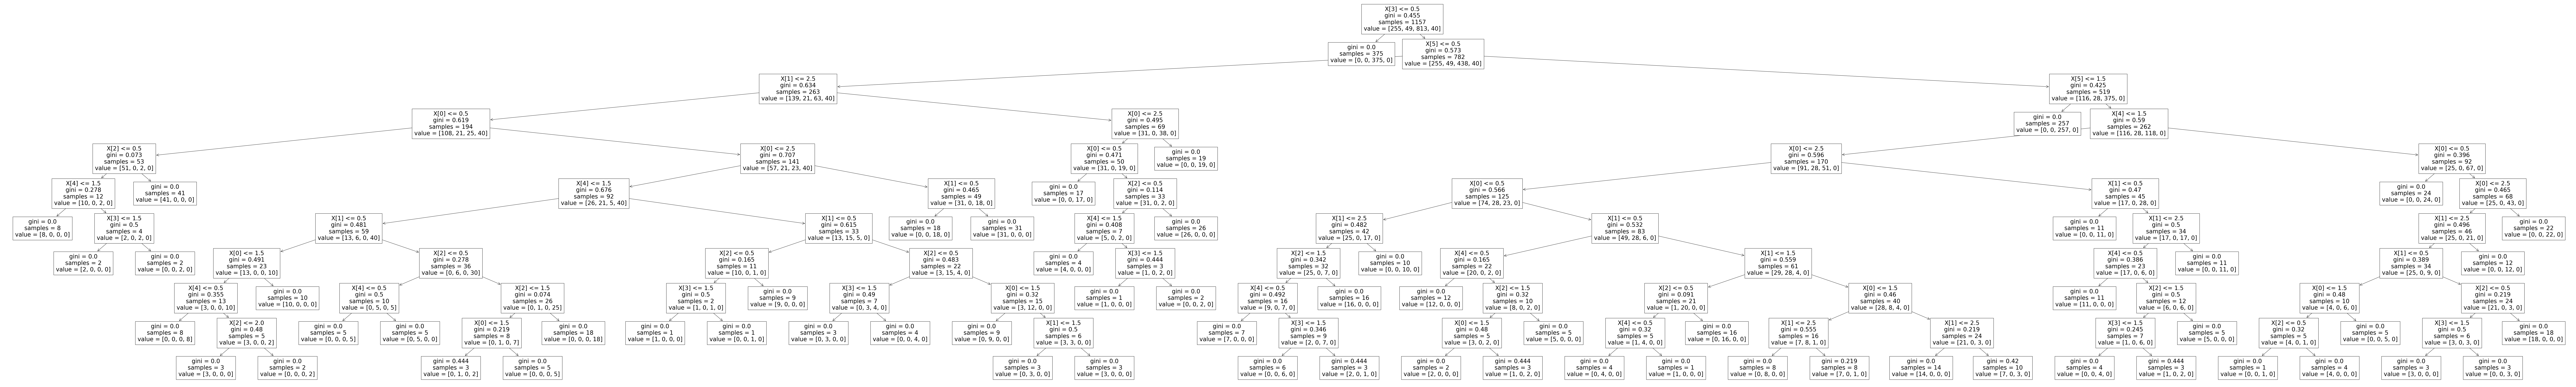

In [44]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name 
tree.plot_tree(dtc);

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

In [40]:
#YOUR CODE HERE
dtc = DecisionTreeClassifier(max_depth = 8, random_state=0, criterion='entropy')
score(dtc, "Decision Tree")

[[114   8   4   3]
 [  5  12   0   3]
 [  9   0 388   0]
 [  0   0   0  25]]
Accuracy for Decision Tree : 0.94396 



Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

In [43]:
#YOUR CODE HERE
#YOUR CODE HERE
dtc = DecisionTreeClassifier(max_depth = 8, random_state=0, criterion='gini')
score(dtc, "Decision Tree")

[[114  10   4   1]
 [  5  13   0   2]
 [  9   0 388   0]
 [  0   3   0  22]]
Accuracy for Decision Tree : 0.94046 



Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [21]:
# XGBClassifier
#YOUR CODE HERE
xgbc = XGBClassifier(n_estimators=1000, learning_rate=0.01)
score(xgbc, "XGBClassifier")

[09:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[120   8   0   1]
 [  0  19   0   1]
 [  0   0 397   0]
 [  1   1   0  23]]
Accuracy for XGBClassifier : 0.97898 



In [29]:
X_train.columns[xgbc.feature_importances_.argsort()]

Index(['doors', 'lug_boot', 'buying', 'maint', 'safety', 'persons'], dtype='object')

Visualize XGBClassifier

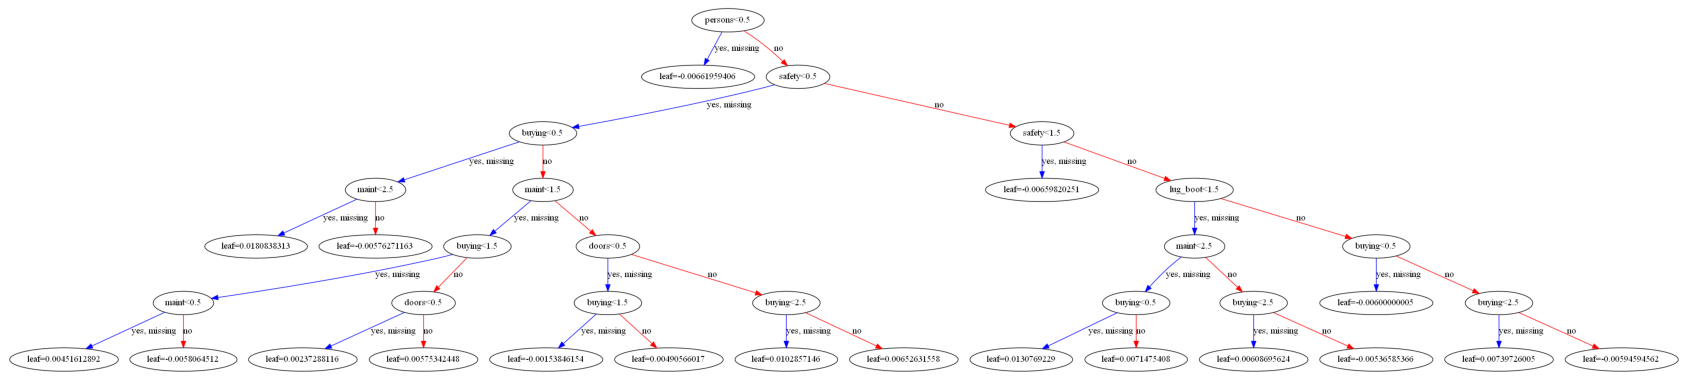

In [45]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
#change the model name 
plot_tree(xgbc, ax=ax)
plt.savefig('xgbc.png')

Now, heres a task for you. Try XGBRFClassifier on your own.

In [61]:
# XGBRFClassifier
xgbrc = XGBRFClassifier(n_estimators=1000, learning_rate=0.01)
score(xgbrc, "XGBRFClassifier")

[09:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[113   1  12   3]
 [ 18   2   0   0]
 [  7   0 390   0]
 [  7   0   0  18]]
Accuracy for XGBRFClassifier : 0.91594 



Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

In [63]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE
xgbc = XGBClassifier(n_estimators=1000, learning_rate=0.1)
score(xgbc, "XGBClassifier")

[09:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[121   7   0   1]
 [  0  19   0   1]
 [  1   0 396   0]
 [  1   2   0  22]]
Accuracy for XGBClassifier : 0.97723 



8. Find the feature importance for XGBClassifier. 

*Hint: It's an inbuilt member variable*

In [58]:
# Cell to find Feature Importance
#YOUR CODE HERE
df.columns[np.argsort(xgbc.feature_importances_)[::-1]]

Index(['safety', 'persons', 'maint', 'buying', 'lug_boot', 'doors'], dtype='object')

**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [59]:
#YOUR CODE HERE
from sklearn.metrics import classification_report
preds = xgbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       129
        good       0.68      0.95      0.79        20
       unacc       1.00      1.00      1.00       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.98       571
   macro avg       0.89      0.94      0.91       571
weighted avg       0.98      0.98      0.98       571



In [30]:
from sklearn.metrics import classification_report
preds = xgbc.predict(X_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       255
        good       0.98      1.00      0.99        49
       unacc       1.00      1.00      1.00       813
       vgood       1.00      1.00      1.00        40

    accuracy                           1.00      1157
   macro avg       0.99      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157



In [32]:
xgbc.score(X_test, y_test)

0.978984238178634

In [35]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [36]:
rfc.score(X_test, y_test)

0.9649737302977233

In [37]:
rfc.score(X_train, y_train)

0.9991356957649092